In [1]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import re
import seaborn as sb
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")





In [2]:
import pandas as pd

dataset1 = pd.read_csv(r"indian_express_headlines.csv")



dataset1.head()


,Headline,Content,Publication Date
0,Sudha Murty in Rajya Sabha: Who are the other ...,The philanthropist and former Infosys Foundati...,"March 8, 2024 23:01 IST"
1,Major takeaways from Congress first list for L...,"Congress insiders say Rahul Gandhi, who has be...","March 8, 2024 23:31 IST"
2,"BJP-TDP on the cusp of a poll deal, announceme...","Chandrababu Naidu, Pawan Kalyan to meet Amit S...","March 8, 2024 21:14 IST"
3,Battleground Azamgarh: To retain Akhilesh’s fo...,As SP looks to wrest control of its former str...,"March 8, 2024 22:54 IST"
4,"As PM Modi announces another LPG price cut, wh...",The reduction of Rs 100 per cylinder comes jus...,"March 8, 2024 16:17 IST"


In [6]:
dataset1=pd.read_csv(r"indian_express_headlines.csv")
cols_of_interest=["Headline","Content"]
fn=dataset1[cols_of_interest]
print(fn.shape)





(17460, 2)


In [7]:
print(fn.describe())


                                                 Headline  \
count                                               17460   
unique                                              17460   
top     Sudha Murty in Rajya Sabha: Who are the other ...   
freq                                                    1   

                                                  Content  
count                                               17452  
unique                                              17435  
top     Here we take a look at the major political eve...  
freq                                                    6  


In [8]:
fn.dropna(subset=['Content','Headline'],inplace=True)
print(fn.shape)
fn.head(100)

(17452, 2)


C:\Users\sudha\AppData\Local\Temp\ipykernel_25676\1983196909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fn.dropna(subset=['Content','Headline'],inplace=True)


,Headline,Content
0,Sudha Murty in Rajya Sabha: Who are the other ...,The philanthropist and former Infosys Foundati...
1,Major takeaways from Congress first list for L...,"Congress insiders say Rahul Gandhi, who has be..."
2,"BJP-TDP on the cusp of a poll deal, announceme...","Chandrababu Naidu, Pawan Kalyan to meet Amit S..."
3,Battleground Azamgarh: To retain Akhilesh’s fo...,As SP looks to wrest control of its former str...
4,"As PM Modi announces another LPG price cut, wh...",The reduction of Rs 100 per cylinder comes jus...
...,...,...
95,Himachal Congress turmoil: Away from CM’s brea...,While they were undecided about what they were...
96,The long blood line of Himachal rebellion: A f...,"The two could not have been further apart, fro..."
97,"CAA again on horizon, Assam Opposition prepare...",16 parties hand over memorandum to President a...
98,Ally CPM’s mouthpiece takes a swipe at Congres...,"While attacking BJP, People's Democracy editor..."


In [9]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17452 entries, 0 to 17459
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  17452 non-null  object
 1   Content   17452 non-null  object
dtypes: object(2)
memory usage: 409.0+ KB


In [10]:
df=fn
df['fakeness'] = 0
df.head(60)

C:\Users\sudha\AppData\Local\Temp\ipykernel_25676\3537293374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fakeness'] = 0


,Headline,Content,fakeness
0,Sudha Murty in Rajya Sabha: Who are the other ...,The philanthropist and former Infosys Foundati...,0
1,Major takeaways from Congress first list for L...,"Congress insiders say Rahul Gandhi, who has be...",0
2,"BJP-TDP on the cusp of a poll deal, announceme...","Chandrababu Naidu, Pawan Kalyan to meet Amit S...",0
3,Battleground Azamgarh: To retain Akhilesh’s fo...,As SP looks to wrest control of its former str...,0
4,"As PM Modi announces another LPG price cut, wh...",The reduction of Rs 100 per cylinder comes jus...,0
5,BJP’s choice to take on Asaduddin Owaisi in Hy...,"Madhavi Latha, who grew up in Old City area of...",0
6,"As RSS apex body meets, Manipur, Sandeshkhali,...","On UCC, Sangh to reiterate that tribal communi...",0
7,Decode Politics: Why TDP is in Delhi for anoth...,TDP saw its seats and vote share slide between...,0
8,Today in Politics: Is BJP set to seal alliance...,PM Modi is likely to make some announcements o...,0
9,24 years after Biju Patnaik confidant was expe...,"Arabinda, a greenhorn in politics, has been ac...",0


In [11]:
tdf = TfidfVectorizer(stop_words='english',ngram_range=(1,2) )
df=df.head(1000)
vectorizer = tdf.fit(df.Content.values.astype('U'))
transformed_text = vectorizer.transform(df.Content.values.astype('U'))
transformed_title = vectorizer.transform(df.Headline.values.astype('U'))

In [12]:
print(df.shape)

(1000, 3)


In [13]:
import numpy as np

def getTfidfTermScores(feature_names, transformed_title):
    term_corpus_dict = {}
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_title.T[term_ind].toarray())
        
    return term_corpus_dict

# Assuming you have already defined 'tdf' and 'transformed_title'

# Get feature names
feature_names = tdf.get_feature_names_out()

# Call the function
term_corpus_dict = getTfidfTermScores(feature_names, transformed_title)




In [15]:
def getSortedTfidfScores(term_corpus_dict):
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    return termNames, scores


termNames, scores = getSortedTfidfScores(term_corpus_dict)

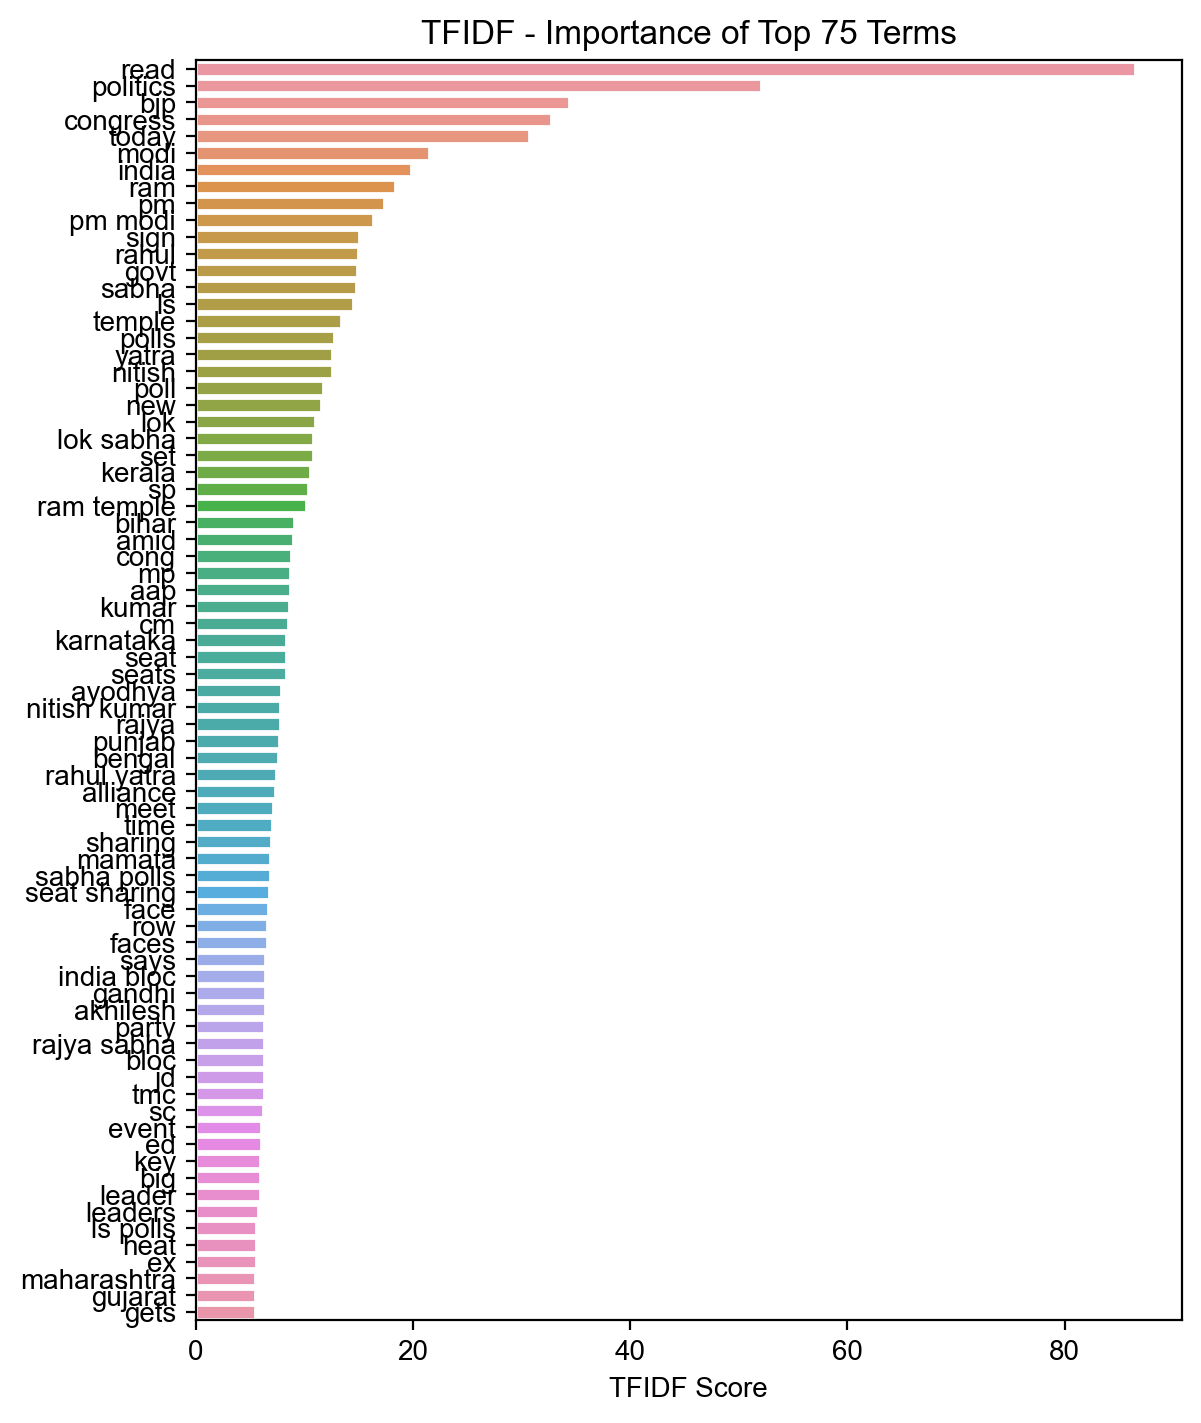

In [16]:




def plotTfidfScores(scores,termNames, n_words = 75):
    fig = plt.figure(figsize = (14, 18))
    override = {'fontsize': 'large'}
    fig.add_subplot(221)   
    n_words = 75
    sb.set()
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title("TFIDF - Importance of Top {0} Terms".format(n_words));
    plt.xlabel("TFIDF Score");




plotTfidfScores(scores, termNames,  n_words = 75)


df.to_csv("legit_cleaned.csv")
